# #PRML ASSIGNMENT 2 SOLUTIONS

# Q1.(1)

In [19]:
import matplotlib.pyplot as plt
import csv
import pandas as pd #To read input csv file
import numpy as np
import random
import math

1.iii. Run the K-means algorithm with K = 4 on the same data. Plot the objective of
K − means as a function of iterations

In [34]:
#Problem in updating centroid--50 dim 

#Reading input from .csv file
inputData=pd.read_csv('A2Q1.csv',header=None) #Relative Pathname--Input must be at same folder as code;
                                                 #header-Otherwise first row is considered as header
npInputData=np.array(inputData).astype(float) 

#print(npInputData.shape)

K = 4 #Required 4 clusters

#Method to calc distance between 2 datapoints
def distance(p1 , p2 ):
    sum=0
    #print (p2)
    #print("Done")
    for i in range(50):#as 50 features for each datapoint
        sum = sum + (p1[i]-p2[i])*(p1[i]-p2[i]) ;
    sum = math.sqrt(sum);
    return sum;


objectiveKmeans = [] #Error difference of current iteration wrt next iteration-objectiveKmeans

#initialize 'K' centroids uniformly at random first
centroidIndex=random.sample(range(0, len(npInputData)), K)
currentCentroid = [npInputData[i] for i in centroidIndex] #currentCentroids- First initialize randomly.

#print(currentCentroid)


#Repeat until convergence-- Here simply considered 100 times
for i in range(100):
    nextCentroidAssignment = []
    #Assign each datapoint to cluster with nearest mean
    for j in npInputData:
        distanceToEachCentroid = [] #To hold for current point j, its distance with all centroids of this iteration
        for k in range(len(currentCentroid)):
            d=distance( j ,currentCentroid[k])
            distanceToEachCentroid.append(d)
        nextCentroidAssignment.append(np.argmin(np.array(distanceToEachCentroid))) #Min dist centroid's cluster is cluster for point in next iteration
        #print("Test")
        
    #Calculate error in current assignment
    for k in range(len(npInputData)):
        error = 0
        error = error + distance(npInputData[i], currentCentroid[nextCentroidAssignment[i]])
        objectiveKmeans.append(error)
        #print(error)
        
    #Calculate the new centroids based on current assignment
    
    #First distribute points to their respective bins, then calculate mean of bin
    bins = [[] for i in range(K)] #K=4 bins to hold datapoints in their cluster
    newCentroid = []
    for i in range(len(npInputData)):
        bins[nextCentroidAssignment[i]].append(npInputData[i])
    for i in range(len(bins)):
        for j in range (50):
            newCentroid.append(np.mean(bins[i][j]))
            #print (newCentroid)
            
    k=0
    for i in range(4):
        for j in range (50):            
            currentCentroid[i][j] = newCentroid[k]
            k=k+1

plt.plot([i for i in range(100)], objectiveKmeans)
plt.xlabel('iteration')
plt.ylabel('objective of K means')
    

IndexError: list index out of range

Q2.ii)Assume that the same data was infact generated from a mixture of Gaussians
with 4 mixtures. Implement the EM algorithm and plot the log-likelihood (averaged over 100 random initializations of the parameters) as a function of iterations.
How does the plot compare with the plot from part (i)? Provide insights that
you draw from this experiment.

## Q2

Q2.ii)

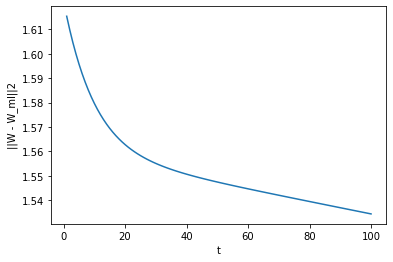

In [34]:
# References:https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5
#https://ocw.tudelft.nl/course-lectures/least-squares-analytical-solution/
#Q1.https://math.stackexchange.com/questions/2141922/em-algorithm-for-exponential-random-variables
#https://stats.stackexchange.com/questions/557302/how-can-i-derive-the-em-algorithm-for-a-mixture-of-two-bernoulli-distributions
#http://statisticalrecipes.blogspot.com/2012/04/applying-em-algorithm-binomial-mixtures.html




#Read training data from csv file

features = []
y = []
with open("A2Q2Data_train.csv", 'r') as file:
    inputData_train = csv.reader(file)
    for row in inputData_train:
        features.append([float(i) for i in row[:len(row)-1]]) #100cols of a row are feature values
        y.append(float(row[-1])) #Last element of the row is y
X = np.array(features)
Y = np.array(y)
X = X.T #d*n matrix, each column- specific datapoint

covarienceMat = np.matmul(X, X.T)

covInv = np.linalg.inv(covarienceMat)
XY = np.matmul(X, Y)
weights = np.matmul(covInv, XY)
randomWeights = np.zeros(100)

stepSize = 0.001
n=len(y)
norms = []
stepNo = []
i = 1

for x in range(100):
    exp1 =  (1/ n) * np.matmul(covarienceMat, randomWeights)
    exp2 =  (1 / n) * XY

    randomWeights = randomWeights - (stepSize * 2 * (exp1 - exp2))
    diff = randomWeights - weights
    norm_weights = np.linalg.norm(diff)

    norms.append(norm_weights)
    stepNo.append(i)
    i = i + 1
    
plt.xlabel('t')
plt.ylabel('||W - W_ml||2')
plt.plot(stepNo, norms)


Q2.iii)
Ans: Here at each step, sample bunch of data points uniformly at random and pretend this sample is entire dataset.

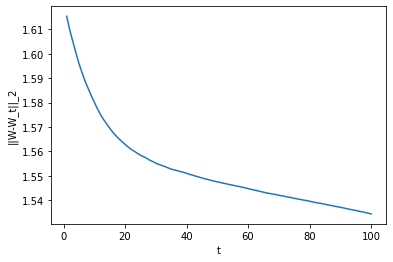

In [36]:
import random
randomWeights2 = np.zeros(100)
stepSize2 = 0.001
norms2 = []
stepNo2 = []
i = 1



for j in range(100):
    randomIndex = random.sample(range(0, 9999), 100)
    npRandomIndex = np.array(randomIndex)
    Xsampled = X[:, npRandomIndex]
    Ysampled = Y[npRandomIndex]
    n2=len(Ysampled)
    
    covarienceMat2 = np.matmul(Xsampled, Xsampled.T)
    XY2 = np.matmul(Xsampled, Ysampled)
    e1 =  (1/ n2) * np.matmul(covarienceMat2, randomWeights2)
    e2 =  (1 / n2) * XY2
    randomWeights2 = randomWeights2 - (stepSize2 * 2 * (e1 - e2))
    diff2 = randomWeights2 - weights
    norm_weights2 = np.linalg.norm(diff2)
    norms2.append(norm_weights2)
    stepNo2.append(i)
    i = i+1
plt.xlabel('t')
plt.ylabel('||W-W_t||_2')
plt.plot(stepNo2, norms2)